# EDA Y REDES NEURONALES

Se ha escogido el dataset Monica de https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/monica.html.
Se ha escogido este dataset por varias razones:
- Por ser uno de los ya estudiados por el profesor, con lo que se espera que los resultados sean interesantes.
- por tener variables categóricas y numéricas.
- por tener un número de variables mayor de 10, criterio éste que ha sido adoptado para que sea represenativo el estudio.
- por tener un número de observaciones alta, superior a 5000.

Este dataset tiene la siguiente estructura:

- Package:DAAG
- Item:monica
- Title:WHO Monica Data
- Rows:6367	
- Cols:12	
- n_binary:3	
- n_character:0
- n_factor:10	
- n_logical:0	
- n_numeric:2
			 	

Las variables son:
- outcome: mortality outcome, a factor with levels live, dead

- age:age at onset

- sex:m = male, f = female

- hosp:y = hospitalized, n = not hospitalized

- yronset:year of onset

- premi:previous myocardial infarction event, a factor with levels y, n, nk not known

- smstat:smoking status, a factor with levels c current, x ex-smoker, n non-smoker, nk not known

- diabetes:a factor with levels y, n, nk not known

- highbp:high blood pressure, a factor with levels y, n, nk not known

- hichol:high cholesterol, a factor with levels y, n nk not known

- angina:a factor with levels y, n, nk not known

- stroke:a factor with levels y, n, nk not known


El nº observaciones por cada clase son:

- dead: 2842 
- live :3525

La clase minoritaria, que es la clase dead, esta suficentemente bien representada como para que no ofrezca limitaciones a su estudio, modelización y clasificación.

- Accuracy base: 55,36%

- Tasa fallos base referencia: 44,64%



## Library loading

In [ ]:
install.packages("ggplot2")
install.packages("naniar")
install.packages("dummies")
install.packages("summarytools")
install.packages("data.table")
install.packages("fastDummies")
install.packages("MASS")
install.packages("dplyr")
install.packages("lattice")
install.packages("caret")
install.packages("rlang")
install.packages("devtools")
install.packages("usethis")
install.packages("doParallel")
install.packages("foreach")
install.packages("iterators")
install.packages("inspectdf")
install.packages("plyr")
options(warn=-1)

In [ ]:
library(ggplot2)
library(naniar)
library(plyr)
library(dummies)
library(fastDummies)
library(MASS)
library(dplyr)
library(lattice)
library(caret)
library(reshape)
library(pROC)
library(parallel)
library(doParallel)
library(rlang)
library(devtools)
library(pkgbuild)


options(warn=-1)

### Read data

In [17]:
df<-read.csv("monica.csv")


In [119]:
head(df)

,X,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,live,f,63,85,n,x,n,y,y,n,n,y
2,2,live,m,59,85,y,x,n,y,n,n,n,y
3,3,live,m,68,85,n,n,n,y,n,n,n,y
4,4,live,m,46,85,n,c,n,n,n,n,n,y
5,5,dead,m,48,85,n,n,y,n,n,y,n,y
6,6,live,f,55,85,n,c,n,y,y,n,n,y


In [120]:
dim(df)

[1] 6367   13

## Exploratory data analysis

Todas las variables factor están bien representadas, tal vez la variable stroke, puede tener una de las categorías que habrá que analizar.

Hay pocas variables numéricas y entre ellas no están muy correlacionadas pues el coeficiente de Pearson entre yronset y age es cero. No aporta nada la variable X pues es el identificador.

Todas las variables tienen un uso de memoria prácticamente similar

#### Data visualization and Summarization

In [122]:
#Exploration statistial of variables
summary(df)

       X        outcome     sex           age           yronset      premi    
 Min.   :   1   dead:2842   f:1762   Min.   :35.00   Min.   :85.00   n :4122  
 1st Qu.:1592   live:3525   m:4605   1st Qu.:55.00   1st Qu.:87.00   nk: 734  
 Median :3184                        Median :61.00   Median :89.00   y :1511  
 Mean   :3184                        Mean   :59.42   Mean   :88.75            
 3rd Qu.:4776                        3rd Qu.:66.00   3rd Qu.:91.00            
 Max.   :6367                        Max.   :69.00   Max.   :93.00            
 smstat    diabetes  highbp    hichol    angina    stroke    hosp    
 c :2051   n :4664   n :2542   n :3294   n :3473   n :4881   n:1925  
 n :1460   nk: 885   nk: 948   nk:1233   nk: 975   nk: 926   y:4442  
 nk: 918   y : 818   y :2877   y :1840   y :1919   y : 560           
 x :1938                                                             
                                                                     
                           

In [18]:
str(df)

'data.frame':	6367 obs. of  13 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ outcome : chr  "live" "live" "live" "live" ...
 $ sex     : chr  "f" "m" "m" "m" ...
 $ age     : int  63 59 68 46 48 55 56 68 69 64 ...
 $ yronset : int  85 85 85 85 85 85 85 85 85 85 ...
 $ premi   : chr  "n" "y" "n" "n" ...
 $ smstat  : chr  "x" "x" "n" "c" ...
 $ diabetes: chr  "n" "n" "n" "n" ...
 $ highbp  : chr  "y" "y" "y" "n" ...
 $ hichol  : chr  "y" "n" "n" "n" ...
 $ angina  : chr  "n" "n" "n" "n" ...
 $ stroke  : chr  "n" "n" "n" "n" ...
 $ hosp    : chr  "y" "y" "y" "y" ...


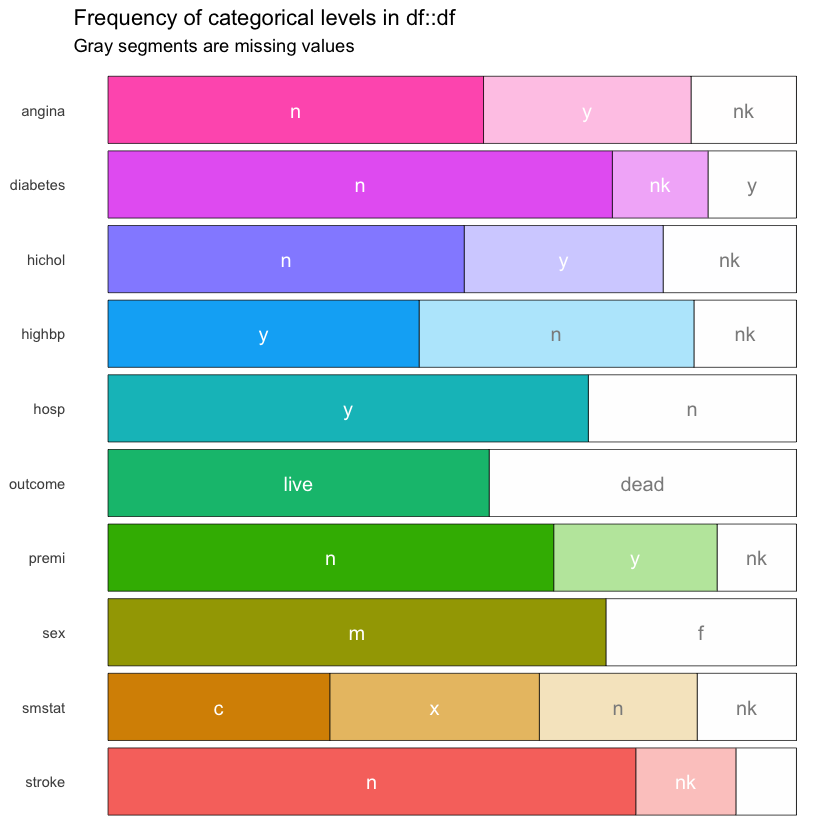

In [19]:

# categorical plot
x <- inspect_cat(df) 
show_plot(x)

Las variables factor están bien representadas

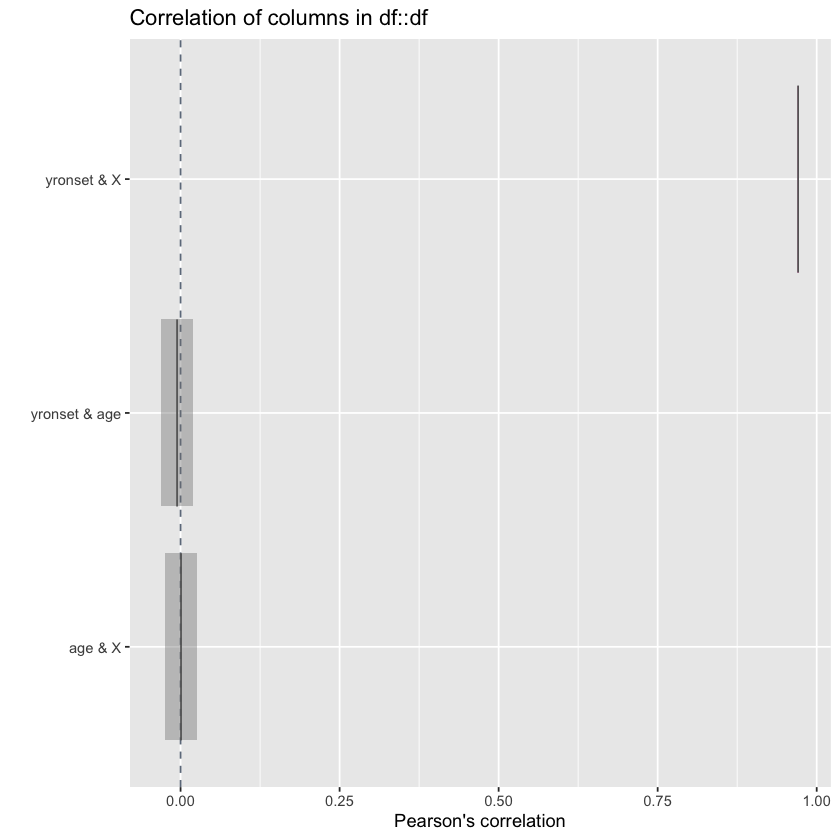

In [20]:
# correlations in numeric columns
x <- inspect_cor(df)
show_plot(x)

No se aprecian correlaciones

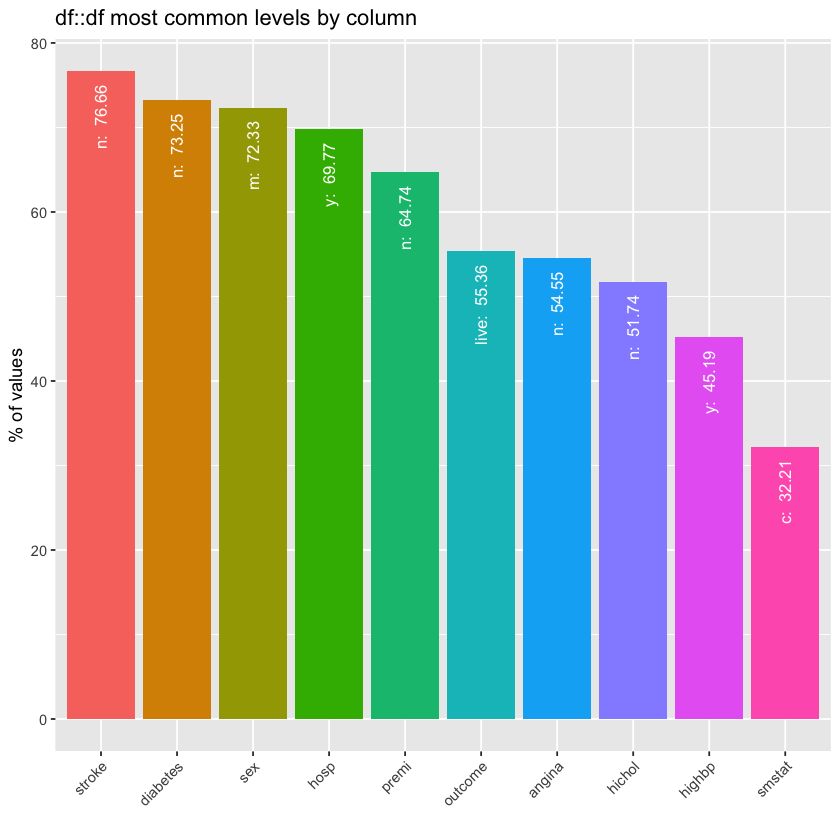

In [21]:
# feature imbalance bar plot
x <- inspect_imb(df)
show_plot(x)

Los clases mayoritarias no superan el 80%, ni están por debajo del 30.

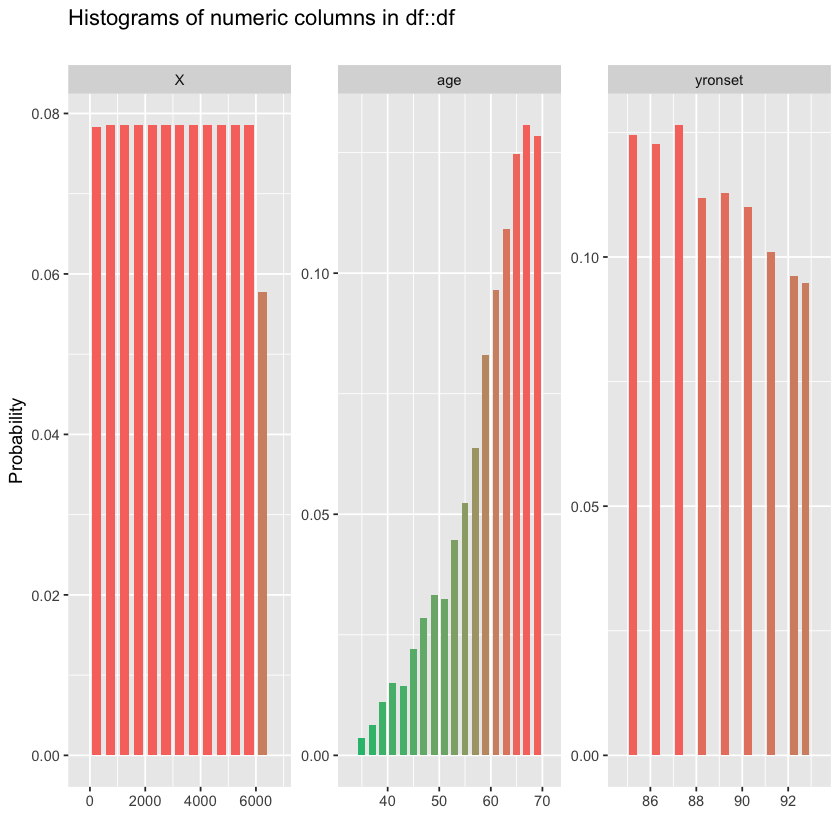

In [22]:
# histograms for numeric columns
x <- inspect_num(df)
show_plot(x)


Excepto la varoable x que es el código de la observación, las otras numéricas no ofrecen histogramas herráticos y amorfos que no puedan asemejarse a alguna distribución conocida, tampoco presentan signos de que tengan que transformarse en factores.

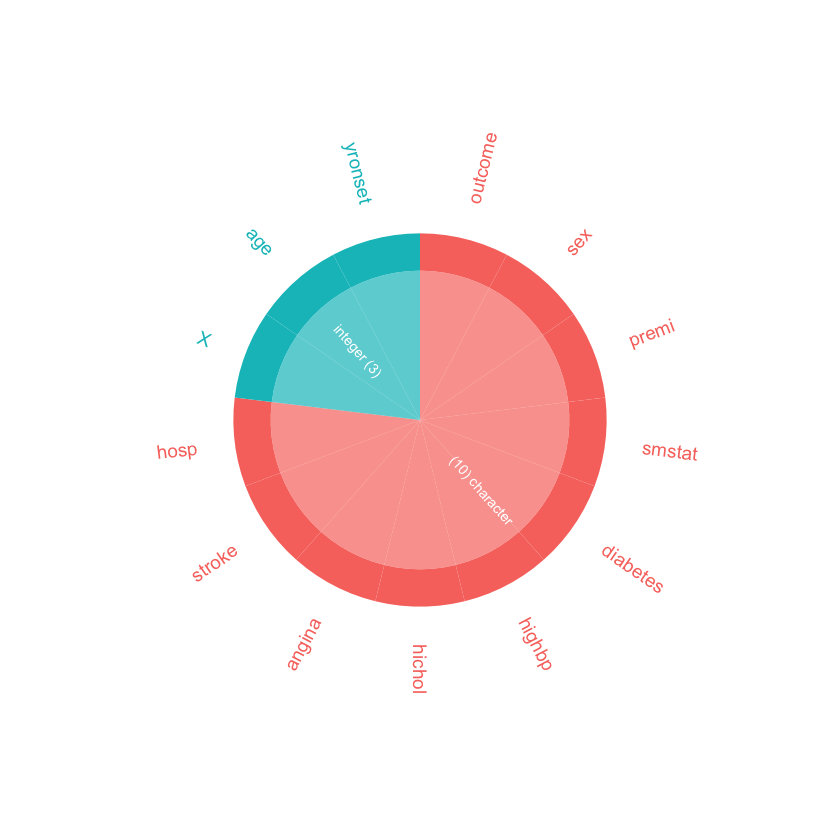

In [23]:

# barplot of column types
x <- inspect_types(df)
show_plot(x)


### Pre-selection of interesting variables 

In [123]:
#names of variables
dput(names(df))

c("X", "outcome", "sex", "age", "yronset", "premi", "smstat", 
"diabetes", "highbp", "hichol", "angina", "stroke", "hosp")


### Creación de listas de variables 

Se ha eliminado la variable ID que no tiene poder predictivo

In [124]:
#Lista de variables continuas
var_cont<-c("age", "yronset")
var_cont

[1] "age"     "yronset"

In [125]:
#lista de variables categóricas
var_cat<-c("sex", "premi", "smstat", 
"diabetes", "highbp", "hichol", "angina", "stroke", "hosp")
var_cat

[1] "sex"      "premi"    "smstat"   "diabetes" "highbp"   "hichol"   "angina"  
[8] "stroke"   "hosp"

In [126]:
#target
df$outcome<-ifelse(df$outcome =='dead','Yes','No')


vardep<-c("outcome")

In [127]:
outcome<-df[,vardep]
outcome<-as.data.frame(outcome)

In [128]:
head(outcome)

,outcome
,<chr>
1,No
2,No
3,No
4,No
5,Yes
6,No


In [129]:
df<-df[,c(var_cont,var_cat,vardep)]
head(df)


,age,yronset,sex,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp,outcome
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,63,85,f,n,x,n,y,y,n,n,y,No
2,59,85,m,y,x,n,y,n,n,n,y,No
3,68,85,m,n,n,n,y,n,n,n,y,No
4,46,85,m,n,c,n,n,n,n,n,y,No
5,48,85,m,n,n,y,n,n,y,n,y,Yes
6,55,85,f,n,c,n,y,y,n,n,y,No


### Analysis dependent variable: target

### Missings

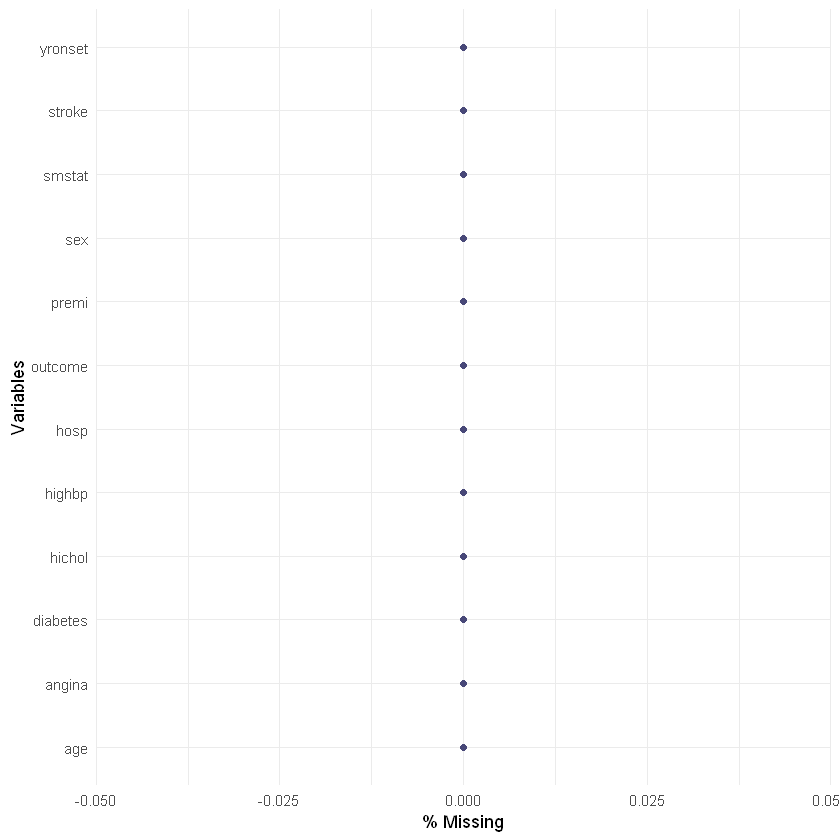

In [130]:
require("naniar")
# función para detectar los missing por variable
gg_miss_var(df,show_pct = TRUE)

In [131]:
# number of rows before instruction
nrow(df)

# Delete 
# (son pocas, también se puede imputar)

df<-na.omit(df)


[1] 6367

In [132]:
# number of rows after instruction
nrow(df)

[1] 6367

It has not been removed any row, there are not any missing values

### Standardize continous variables

In [133]:
# calculate mean 
means<-apply(df[,var_cont],2,mean,na.rm=TRUE)
print(means)

     age  yronset 
59.41998 88.74902 


In [134]:
#calculate standard deviation
sds<-sapply(df[,var_cont],sd,na.rm=TRUE)
print(sds)

     age  yronset 
7.853923 2.558180 


In [135]:
#Scale every variable, standardize variables
df2<-scale(df[,var_cont], center = means, scale = sds)
#Create dataframe with standardize variables
df1<-data.frame(cbind(df2,df[,c(var_cat)]))
#Save dataframe in file
save(df1,file="df1.Rda")


In [136]:
dim(df1)

[1] 6367   11

In [137]:
head(df1)

,age,yronset,sex,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0.45582598,-1.465502,f,n,x,n,y,y,n,n,y
2,-0.05347366,-1.465502,m,y,x,n,y,n,n,n,y
3,1.09245054,-1.465502,m,n,n,n,y,n,n,n,y
4,-1.70869752,-1.465502,m,n,c,n,n,n,n,n,y
5,-1.45404770,-1.465502,m,n,n,y,n,n,y,n,y
6,-0.56277331,-1.465502,f,n,c,n,y,y,n,n,y


In [138]:
dput(names(df1))

c("age", "yronset", "sex", "premi", "smstat", "diabetes", "highbp", 
"hichol", "angina", "stroke", "hosp")


In [139]:
head(df)

,age,yronset,sex,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp,outcome
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,63,85,f,n,x,n,y,y,n,n,y,No
2,59,85,m,y,x,n,y,n,n,n,y,No
3,68,85,m,n,n,n,y,n,n,n,y,No
4,46,85,m,n,c,n,n,n,n,n,y,No
5,48,85,m,n,n,y,n,n,y,n,y,Yes
6,55,85,f,n,c,n,y,y,n,n,y,No


### Create frecuency table for variables

In [140]:
# Create frecuency table for xxxxxxx variables
require(plyr)
frecu<-ldply(df1[,var_cat],function(x) t(rbind(names(table(x)),table(x))))
names(frecu)<-c("variable","level","frecuency")
frecu$frecuency<-as.numeric(frecu$frecuency)
frecu

variable,level,frecuency
<chr>,<chr>,<dbl>
sex,f,1762
sex,m,4605
premi,n,4122
premi,nk,734
premi,y,1511
smstat,c,2051
smstat,n,1460
smstat,nk,918
smstat,x,1938


As we just ckeck before in gross analisys, every category is represented with enough number of registers. Anyway we are not going to trasnform in factor this varaibles.


### Creating variables dummies from categorical variables

In [141]:

#creamos un dataframe nuevo con las dummies
#comprobamos que no hay variables categórícas en la lista de variables numéricas
#df3<-dummy.data.frame(df1, var_cat, sep = ".")
#head(df3)
require(fastDummies)


In [142]:
df3<-dummy_cols(df1,
  select_columns = var_cat,
  remove_first_dummy = TRUE,
  remove_most_frequent_dummy = FALSE,
  ignore_na = TRUE,
  remove_selected_columns = TRUE)

In [143]:
head(df3)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [144]:
frecu20<-frecu[frecu$frecuency<244,]#5% of hight number of registers of categorical variable
frecu20

variable,level,frecuency
<chr>,<chr>,<dbl>


No hay ninguna categoría mal representada

### Data as a result of EDA analysis

In [145]:
dim(df3)

[1] 6367   19

In [146]:
data<-cbind(df3,outcome)

In [147]:
head(data)
# El archivo data ya está preparado:no hay missing, las continuas salvo la dependiente 
# están estandarizadas y las categoricas pasadas a dummy

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


We have:
- 2 continous variavels and standarized
- 17 categorical variables 
- 1 dependet variavel dummie

In [148]:
dput(names(data))

c("age", "yronset", "sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y", "outcome")


In [149]:
save(data,file="data.Rda")

## Feature Selection

In [150]:
load("data.Rda")

### Wrappers: Step AIC

In [151]:

full<-glm(factor(outcome)~.,data=data,family = binomial(link="logit"))
null<-glm(factor(outcome)~1,data=data,family = binomial(link="logit"))

selec1<-step(null,
                scope=list(upper=full),
                direction="both",
                trace=FALSE)

In [152]:
summary(selec1)


Call:
glm(formula = factor(outcome) ~ hosp_y + highbp_nk + age + angina_nk + 
    angina_y + smstat_nk + yronset + stroke_y + stroke_nk + premi_nk + 
    premi_y + diabetes_y + hichol_y + sex_m, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7151  -0.5718  -0.3380   0.0600   2.6925  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.95963    0.58421  10.201  < 2e-16 ***
hosp_y      -7.86728    0.58144 -13.531  < 2e-16 ***
highbp_nk    1.06028    0.25155   4.215 2.50e-05 ***
age          0.42133    0.05024   8.386  < 2e-16 ***
angina_nk    1.14001    0.23325   4.887 1.02e-06 ***
angina_y     0.38607    0.09714   3.974 7.06e-05 ***
smstat_nk    0.91942    0.19606   4.689 2.74e-06 ***
yronset     -0.21260    0.04266  -4.984 6.23e-07 ***
stroke_y     0.60620    0.12026   5.041 4.64e-07 ***
stroke_nk    0.91343    0.27901   3.274  0.00106 ** 
premi_nk     0.90913    0.26972   3.371

In [153]:
#Variavels that are part of model
dput(names(selec1$coefficients))

c("(Intercept)", "hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m")


In [154]:
# Esto si se quiere en versión formula
formula(selec1)


factor(outcome) ~ hosp_y + highbp_nk + age + angina_nk + angina_y + 
    smstat_nk + yronset + stroke_y + stroke_nk + premi_nk + premi_y + 
    diabetes_y + hichol_y + sex_m

In [155]:
model_AIC<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m")

### Wrappers: Step BIC

In [156]:
full<-glm(factor(outcome)~.,data=data,family = binomial(link="logit"))
null<-glm(factor(outcome)~1,data=data,family = binomial(link="logit"))

selec2<-step(null,
                scope=list(upper=full),
                direction="both",
                trace=FALSE,
                k=log(nrow(data)))


In [157]:
summary(selec2)


Call:
glm(formula = factor(outcome) ~ hosp_y + highbp_nk + age + angina_nk + 
    angina_y + smstat_nk + yronset + stroke_y + stroke_nk, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6920  -0.5789  -0.3445   0.0605   2.6563  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.86781    0.57916  10.132  < 2e-16 ***
hosp_y      -7.86585    0.58132 -13.531  < 2e-16 ***
highbp_nk    1.10888    0.25015   4.433 9.30e-06 ***
age          0.44437    0.04951   8.976  < 2e-16 ***
angina_nk    1.30681    0.22958   5.692 1.25e-08 ***
angina_y     0.50003    0.08687   5.756 8.61e-09 ***
smstat_nk    1.05189    0.19161   5.490 4.03e-08 ***
yronset     -0.22685    0.04198  -5.404 6.52e-08 ***
stroke_y     0.65658    0.11882   5.526 3.28e-08 ***
stroke_nk    0.99123    0.27662   3.583 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for bin

In [158]:
dput(names(selec2$coefficients))

c("(Intercept)", "hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk")


In [159]:
model_BIC<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk")

### STEP WISE repetido

In [160]:
source("funcion steprepetido binaria.R")

In [161]:
#data<-cbind(df3,outcome)
listconti<-dput(names(data))

c("age", "yronset", "sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y", "outcome")


In [162]:
vardep<-c("outcome")

In [163]:
#data<-as.data.frame(data)
#class(data)

In [164]:
listconti<-c("age", "yronset","sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y")





In [165]:
lista<-steprepetidobinaria(data=data,
                    vardep=vardep,
                    listconti=c("age", "yronset","sex_m", "premi_nk", "premi_y", "smstat_n", 
                    "smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
                    "highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
                    "stroke_nk", "stroke_y", "hosp_y"),
                    sinicio=12345,
                    sfinal=12385,
                    porcen=0.8,
                    criterio="BIC")
options(warn=-1)

In [166]:
#tabla de frecuencias de los modelos muestreados
tabla<-lista[[1]]
tabla

,modelo,Freq,contador
,<chr>,<int>,<dbl>
1,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk,13,9
14,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+premi_nk,8,9
22,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+premi_nk+premi_y,5,10
27,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y,4,8
31,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+premi_nk+stroke_nk,2,10
33,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+stroke_nk+premi_y,2,10
35,hosp_y+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+premi_nk+stroke_nk,1,9
36,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+diabetes_y,1,9
37,hosp_y+highbp_nk+age+smstat_nk+angina_nk+yronset+stroke_y+angina_y+premi_nk+hichol_y,1,10


In [167]:
#list of names of variavels of first model
model_SW_1<-dput(lista[[2]][[1]])

c("hosp_y", "stroke_nk", "age", "smstat_nk", "stroke_y", "yronset", 
"highbp_nk", "angina_y", "angina_nk")


El modelo primero aparece 13 veces en un rango de 40 iteraciones, y tiene 9 vairables, con lo que parece muy interesante. 

In [168]:
#list of names of variavels of second model
model_SW_2<-dput(lista[[2]][[2]])

c("hosp_y", "highbp_nk", "age", "smstat_nk", "angina_nk", "yronset", 
"stroke_y", "angina_y", "premi_nk")


## Validation models

Modelos que se tienen hasta ahora y que van a ser valiados y comparados.

In [169]:
#Model all in, with all variables together.
model_Allin<-c("age", "yronset", "sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y")

In [170]:
model_AIC<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m")

In [171]:
model_BIC<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk")

In [172]:
model_SW_2<-c("hosp_y", "highbp_nk", "age", "smstat_nk", "angina_nk", "yronset", 
"stroke_y", "angina_y", "premi_nk")

In [173]:
#model_DF1_before_dummies (con data=df1)
model_DF1_before_dummies<-c("age", "yronset", "sex", "premi", "smstat", "diabetes", "highbp", 
"hichol", "angina", "stroke", "hosp")

Tenemos 5 modelos tentativos:


In [174]:
cat("model_Allin with", length(model_Allin) ,"variables","\n")
cat("model_AIC with", length(model_AIC) ,"variables","\n")
cat("model_BIC with", length(model_BIC) ,"variables","\n")
cat("model_SW_2 with", length(model_SW_2) ,"variables","\n")
cat("model_DF1_before_dummies with", length(model_DF1_before_dummies) ,"variables","\n")
#model_BIC and model_SW_1 are the same

model_Allin with 19 variables 
model_AIC with 14 variables 
model_BIC with 9 variables 
model_SW_2 with 9 variables 
model_DF1_before_dummies with 11 variables 


### Cross validation and compare throw box-plots

We check with Cross validation :
- model_Allin with 19 variables 
- model_AIC with 14 variables 
- model_BIC with 9 variables 
- model_SW_2 with 9 variables
- model_DF1_before_dummies 




In [175]:
source("cruzadas avnnet y log binaria.R")

#### model 1-(model_Allin with 19 variables,all variavels; 10 groups ; 100 iterations)

In [176]:
head(data)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


In [177]:
medias1<-cruzadalogistica(data=data,
                    vardep=vardep,
                    listconti=
c("age", "yronset", "sex_m", "premi_nk", "premi_y", "smstat_n", 
"smstat_nk", "smstat_x", "diabetes_nk", "diabetes_y", "highbp_nk", 
"highbp_y", "hichol_nk", "hichol_y", "angina_nk", "angina_y", 
"stroke_nk", "stroke_y", "hosp_y"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


In [178]:
# we add a column with number 1 to put a name of this vector
medias1$modelo=1

In [179]:
head(medias1)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1221926,0.9198632,1
2,0.1218784,0.9206475,1
3,0.1220355,0.9206748,1
4,0.1226637,0.9204064,1
5,0.1225067,0.9208510,1
6,0.1220355,0.9209048,1


#### model 2-(model_AIC with 14 variables; 10 groups ; 100 iterations)

In [74]:
medias2<-cruzadalogistica(data=data,
                    vardep=vardep,
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


In [75]:
# we add a column with number 1 to put a name of this vector
medias2$modelo=2

In [76]:
head(medias2)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1214073,0.9204076,2
2,0.1212502,0.9211092,2
3,0.1212502,0.9212915,2
4,0.1221926,0.9210207,2
5,0.1217214,0.9214835,2
6,0.1215643,0.9215161,2


#### model 3-(model_BIC with 9 variables; 10 groups ; 100 iterations)

In [77]:
medias3<-cruzadalogistica(data=data,
                    vardep=vardep,
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


In [78]:
# we add a column with number 1 to put a name of this vector
medias3$modelo=3

In [79]:
head(medias3)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1210931,0.9194502,3
2,0.1209361,0.9195634,3
3,0.1204649,0.9198817,3
4,0.1212502,0.9196306,3
5,0.1201508,0.9197959,3
6,0.1199937,0.9198078,3


#### model 4-(model_SW_2 with 9 variables; 10 groups ; 100 iterations)

In [80]:
medias4<-cruzadalogistica(data=data,
                    vardep=vardep,
                    listconti=
c("hosp_y", "highbp_nk", "age", "smstat_nk", "angina_nk", "yronset", 
"stroke_y", "angina_y", "premi_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


In [81]:
# we add a column with number 1 to put a name of this vector
medias4$modelo=4

In [82]:
head(medias4)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1220355,0.9194437,4
2,0.1223496,0.9196020,4
3,0.1218784,0.9197792,4
4,0.1217214,0.9196538,4
5,0.1218784,0.9197675,4
6,0.1212502,0.9198245,4


#### model 5-(model_DF1_before_dummies; 10 groups ; 100 iterations)

In [180]:
data_df1<-cbind(df1,outcome)
#data_df1$outcome<-ifelse(data_df1$outcome =='dead','Yes','No')

In [181]:
medias5<-cruzadalogistica(data=data_df1,
                    vardep=vardep,
                    listconti=
c("age", "yronset", "sex", "premi", "smstat", "diabetes", "highbp", 
"hichol", "angina", "stroke", "hosp"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


In [182]:
# we add a column with number 1 to put a name of this vector
medias5$modelo=5

In [183]:
head(medias5)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1221926,0.9198632,5
2,0.1218784,0.9206475,5
3,0.1220355,0.9206748,5
4,0.1226637,0.9204064,5
5,0.1225067,0.9208510,5
6,0.1220355,0.9209048,5


### Boxplot medias vectors

In [185]:
union1<-rbind(medias1,medias2,medias3,medias4,medias5)

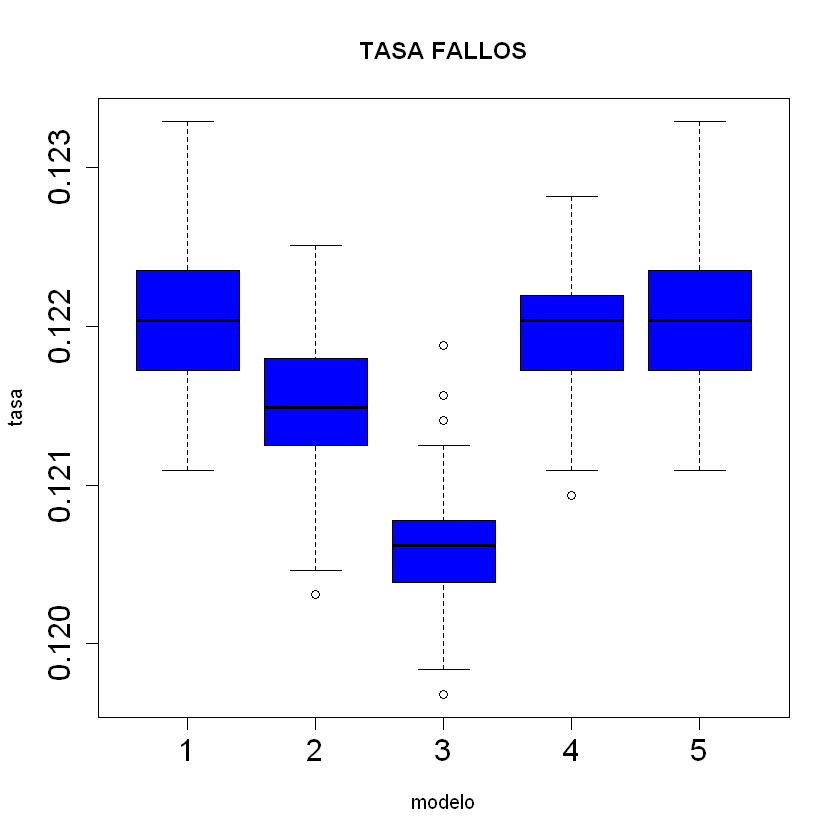

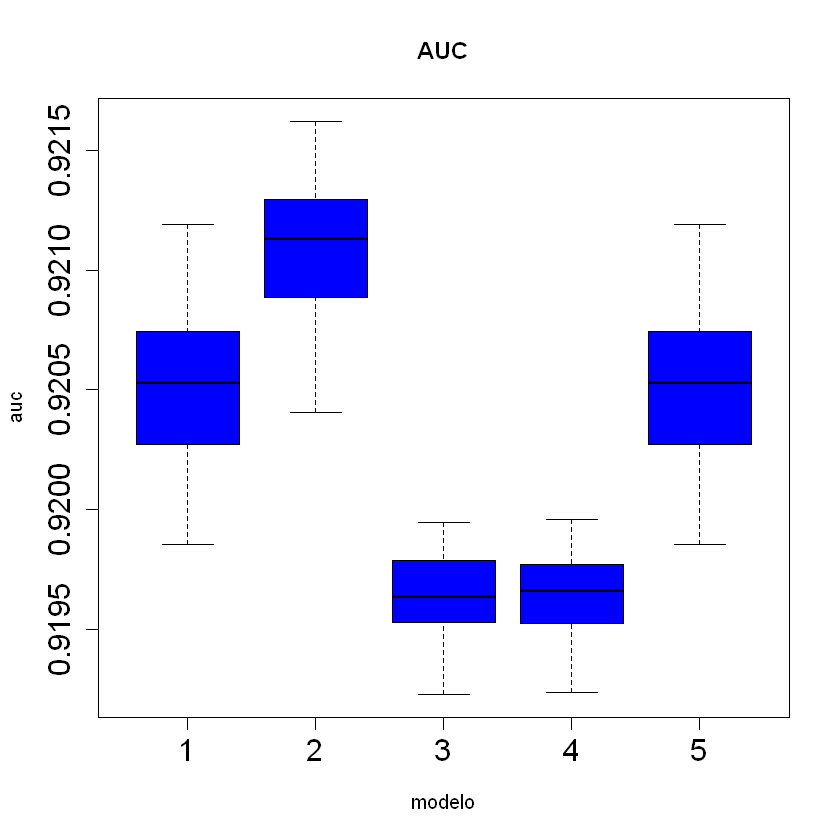

In [186]:
par(cex.axis=1.5)
boxplot(data=union1,tasa~modelo,main="TASA FALLOS",col="blue")
boxplot(data=union1,auc~modelo,main="AUC",col="blue")

El modelo 1 y el modelo 5 medan los mismos valores. El modelo 3 es un modelo más sencillo, con sólo 9 variables, y que presenta uan tasa de fallos menor que el resto de modelos. Aunque tiene un área bajo la curva un poco menor, la diferencia respecto al mejor es de 0,0015 uds que no se considera suficient como para tener un modelo ás complicado, con lo que a priori escogemos el modelo 3 como mejor modelo. Junto a este no se descarta talmente el modelo 2 que tiene una tasa de fallos un poco mayor, pero un área bajo curva un poco mayor, por lo que se va a realizar el tunning de los dos con 100 y 500 iteraciones para evaluar los mejores resultados.

In [188]:
#el porcentage de yes frente a no es del 44,64%
round(100*2842/(2842+3525),2)

[1] 44.64

## Tunning net with caret 

Con el mejor o mejores modelos, estudiamos los mejores parámetros (nodos, decay) en redes
neuronales tuneando con caret.

Se estudiarán los modelosos 2 y 3.

#### Cross validation modelo 3

In [254]:
vardep<-c("outcome")
listconti<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk")
paste(listconti,collapse = "+")


[1] "hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk"

In [255]:
#'hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk'

1.-First stage of Caret: Control
- objet with train control
- Resamplig with Cross validation
- ten groups

In [256]:
control<-trainControl(method = "cv",number=10,savePredictions = "all") 

2.-Second Stage: defining grid of hyperparametters(12 differente configurtions)
- number of nuts
- weight decay, for learning rate.

In [257]:
avnnetgrid <-expand.grid(size=c(5,10,15,20),
                         decay=c(0.01,0.1,0.001),bag=FALSE)

3.-Third Stage: train model 

In [258]:
medias6<- train(outcome~ 
                hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
                data=data,
                method="avNNet",
                linout = FALSE,
                maxit=100,
                trControl=control,
                tuneGrid=avnnetgrid,
                repeats=5)

In [259]:
medias6$modelo=6

In [260]:
medias6

Model Averaged Neural Network 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5730, 5731, 5730, 5730, 5730, 5729, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   5    0.001  0.8795370  0.7505381
   5    0.010  0.8789056  0.7493281
   5    0.100  0.8771800  0.7458211
  10    0.001  0.8767083  0.7449646
  10    0.010  0.8746660  0.7409870
  10    0.100  0.8774930  0.7465498
  15    0.001  0.8754524  0.7424188
  15    0.010  0.8738810  0.7393641
  15    0.100  0.8768650  0.7453434
  20    0.001  0.8746650  0.7409667
  20    0.010  0.8727807  0.7371564
  20    0.100  0.8767083  0.7449839

Tuning parameter 'bag' was held constant at a value of FALSE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5, decay = 0.001 and bag
 = FALSE.

El modelo escogido será el de 5 nodos, con decay de 0,001, pues nodosos da el mayor valor de Accuracy. Con esos parámetros haremos la cross validation repetiva.

#### Cross validation modelo 2

In [261]:
vardep<-c("outcome")
listconti<-c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m")
paste(listconti,collapse = "+")


[1] "hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk+premi_nk+premi_y+diabetes_y+hichol_y+sex_m"

1.-First stage of Caret: Control

objet with train control
Resamplig with Cross validation
ten groups

In [262]:
control<-trainControl(method = "cv",number=10,savePredictions = "all") 

2.-Second Stage: defining grid of hyperparametters(12 differente configurtions)

number of nuts
weight decay, for learning rate.

In [263]:
avnnetgrid <-expand.grid(size=c(5,10,15,20),
                         decay=c(0.01,0.1,0.001),bag=FALSE)

3.-Third Stage: train model

In [264]:
medias7<- train(outcome~ 
                   hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk+premi_nk+premi_y+diabetes_y+hichol_y+sex_m,
                  data=data,method="avNNet",linout = FALSE,maxit=100,
                  trControl=control,tuneGrid=avnnetgrid, repeats=5)

In [265]:
medias7$modelo=7

In [266]:
medias7

Model Averaged Neural Network 

6367 samples
  14 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5729, 5730, 5730, 5731, 5730, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   5    0.001  0.8763975  0.7441713
   5    0.010  0.8757683  0.7430983
   5    0.100  0.8790675  0.7498847
  10    0.001  0.8765550  0.7449031
  10    0.010  0.8745117  0.7408795
  10    0.100  0.8763965  0.7446236
  15    0.001  0.8748247  0.7419583
  15    0.010  0.8727841  0.7378217
  15    0.100  0.8729411  0.7376492
  20    0.001  0.8762368  0.7448076
  20    0.010  0.8735688  0.7395434
  20    0.100  0.8727856  0.7375238

Tuning parameter 'bag' was held constant at a value of FALSE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5, decay = 0.1 and bag = FALSE.

### Cross validation repetitive

####  Cross validation repetitive: 100 iteractions modelo 3 [size = 5, decay = 0.1]

In [268]:

medias8<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=100,
                       size=c(5),
                       decay=c(0.001))




  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8778643 0.7472501 0.01112539 0.02350109


In [269]:
medias8$modelo=8

In [270]:
head(medias8)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1221926,0.9118762,8
2,0.1226637,0.9084950,8
3,0.1215643,0.9125467,8
4,0.1214073,0.9136701,8
5,0.1236061,0.9070676,8
6,0.1218784,0.9104554,8


####  Cross validation repetitive: 500 iterations modelo 3 [size = 5, decay = 0.1]

In [271]:

medias9<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

medias9$modelo=9


  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8767774 0.7450545 0.01110455 0.02346587


In [272]:
head(medias9)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1231349,0.9179865,9
2,0.1218784,0.9178961,9
3,0.1226637,0.9176224,9
4,0.1229779,0.9163167,9
5,0.1256479,0.9169407,9
6,0.1231349,0.9179389,9


#### Cross validation repetitive: 100 iteractions modelo 2

In [273]:
medias10<-cruzadaavnnetbin(data=data,
                       vardep="outcome",listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m"),
                       listclass=c(""),grupos=10,sinicio=1234,repe=25,repeticiones=5,itera=100,
                       size=c(5),decay=c(0.1))


  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5   0.1 FALSE 0.8769537 0.7456077  0.0109435 0.02306073


In [274]:
medias10$modelo=10


In [275]:
head(medias10)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1239202,0.9190394,10
2,0.1231349,0.9197286,10
3,0.1218784,0.9205322,10
4,0.1243914,0.9198499,10
5,0.1239202,0.9210522,10
6,0.1232920,0.9192156,10


#### Cross validation repetitive:  500 iteractions modelo 2

In [277]:
medias11<-cruzadaavnnetbin(data=data,
                       vardep="outcome",listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk", "premi_nk", 
"premi_y", "diabetes_y", "hichol_y", "sex_m"),
                       listclass=c(""),grupos=10,sinicio=1234,repe=25,repeticiones=5,itera=500,
                       size=c(5),decay=c(0.1))







  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5   0.1 FALSE 0.8766019 0.7449503 0.01124439 0.02368537


In [278]:
medias11$modelo=11


In [280]:
head(medias11)

,tasa,auc,modelo
,<dbl>,<dbl>,<dbl>
1,0.1231349,0.9186272,11
2,0.1236061,0.9194230,11
3,0.1229779,0.9197108,11
4,0.1232920,0.9196460,11
5,0.1242343,0.9205602,11
6,0.1232920,0.9188729,11


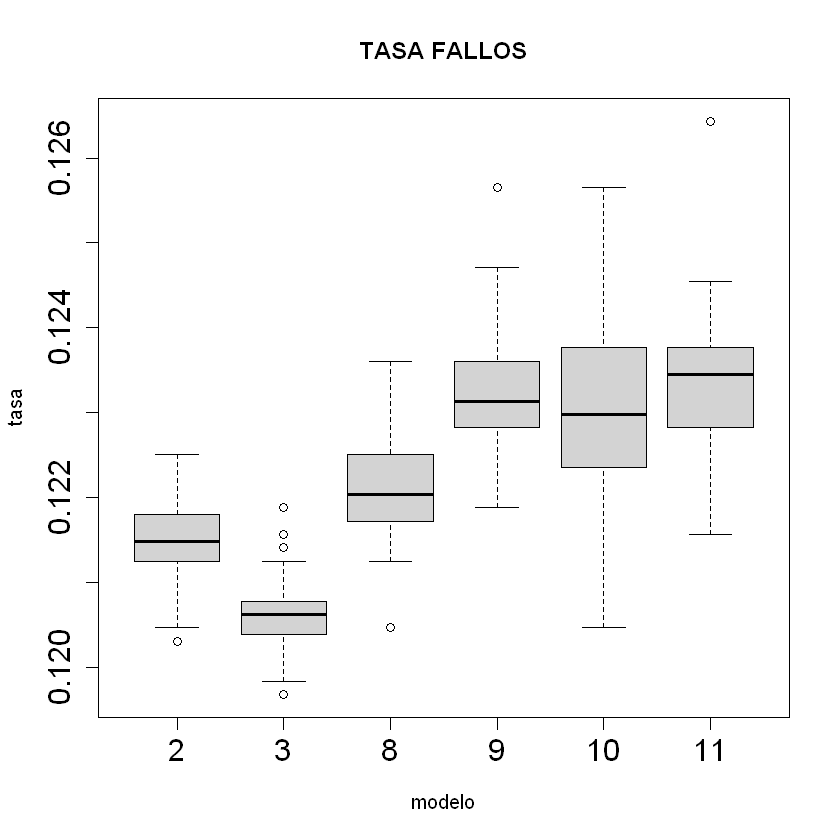

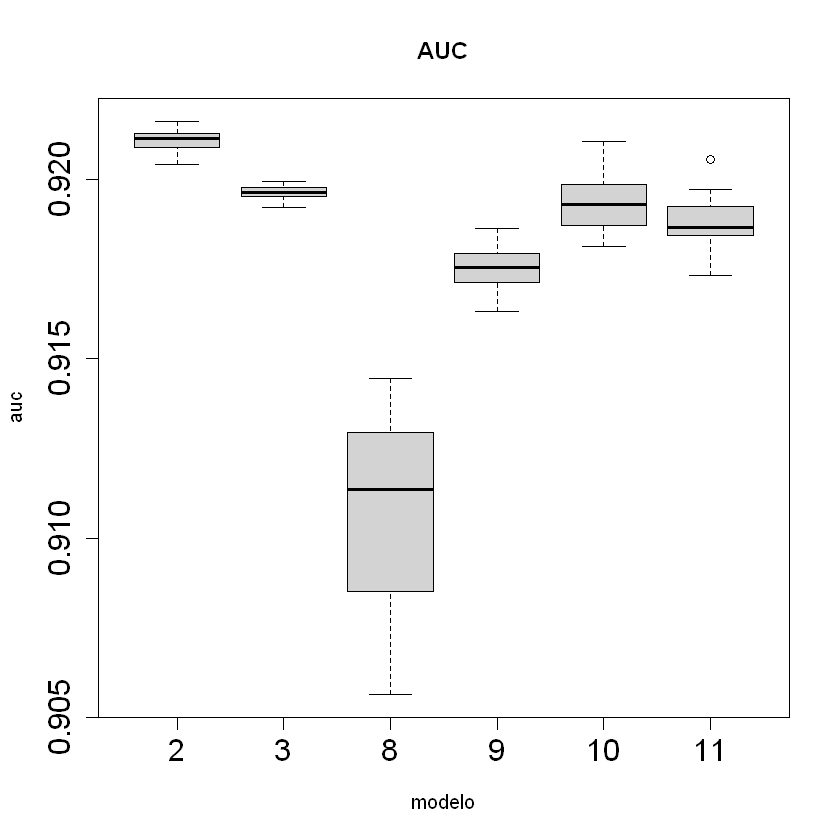

In [281]:
union2<-rbind(medias2,medias3,medias8,medias9,medias10,medias11)
par(cex.axis=1.5)
boxplot(data=union2,tasa~modelo,main="TASA FALLOS")
boxplot(data=union2,auc~modelo,main="AUC")

El modelo de red que se escge es el medias 9, que se consigue con 500 iteraciones sobre las 9 variables[size = 5, decay = 0.1] Se hace esta selección atendiendo a que la diferencia en el área debajo de la curva entre el modelo 9, 10 y 11 no es muy grande y tampoco la diferencia entre tasa de fallos, por el contrario sí presenta el modelo 9 una lista de variables menor que lo hace más sencillo. Es por ello que se escoge el modelo 9. 

### Comparación de modelos

In [190]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"


In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

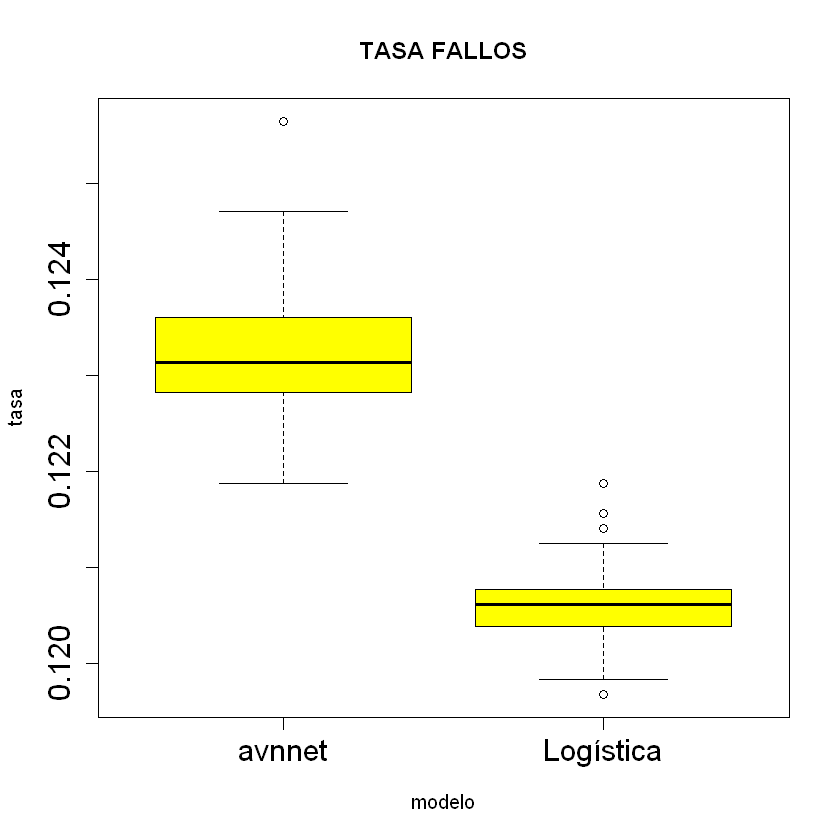

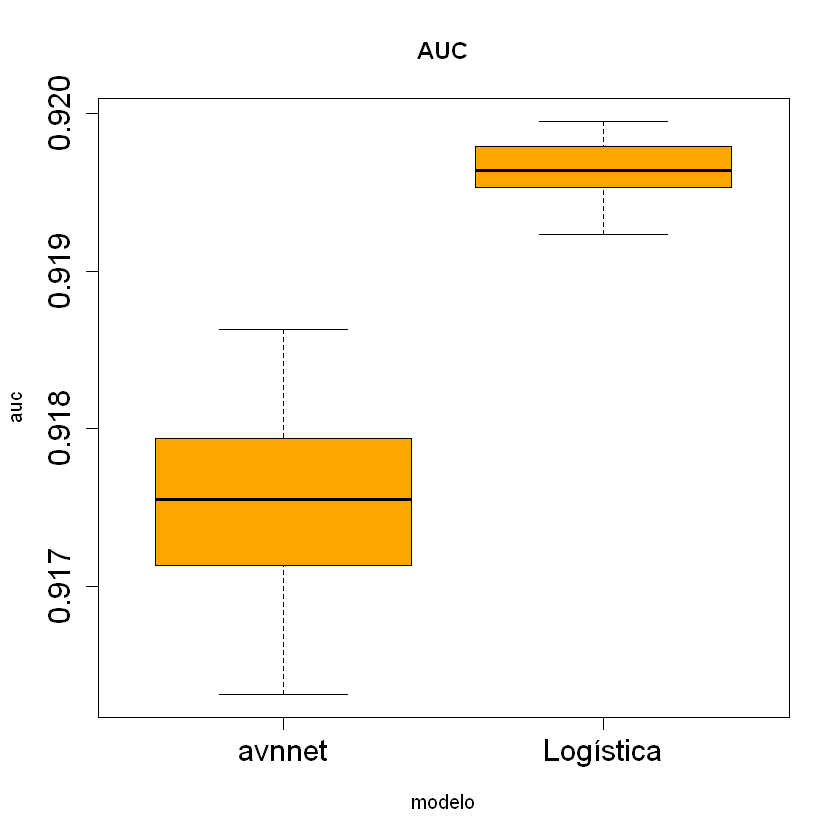

In [193]:
union3<-rbind(medias_1,medias_2)
par(cex.axis=1.5)
boxplot(data=union3,tasa~modelo,main="TASA FALLOS",col="yellow")
boxplot(data=union3,auc~modelo,main="AUC",col="orange")

### Modelo ganador

Se aprecia que aunque las diferencias no son muy acusadas, la regresión logística ofrece mejores resultados que la red neuronal.Tiene un AUC mayor y una tasa de fallos menor.